# Explore the Data

In [159]:
import pandas as pd
import processTurnstiles
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### List functions of the processTurnstiles module

In [2]:
help(processTurnstiles)

Help on module processTurnstiles:

NAME
    processTurnstiles - Jonathan L Chu, 2020 for Metis SF20_DS18

DESCRIPTION
    Module to download and process
    MTA turnstiles data for use in pandas

FUNCTIONS
    get_data(week_nums)
        Downloads MTA turnstiles data from site, for specified week_nums.
        Returns pandas dataframe of raw data
    
    processTurnstiles(df)
        Reads in raw MTA turnstile data as a pd dataframe
        Converts 'DATE' and 'TIME' cols to Datetime objects,
        adds 'ENTRIES_DIFF' col of count of entries (calculated 
        from 'ENTRIES' running total)
        
        Please be careful about the automatic outlier removal here
        
        Returns: pandas DataFrame
    
    readProcessedData(path)
        Reads in ALREADY PROCESSED turnstile data from 'file' and drops old index,
        then converts DATETIME and DATE columns to datetime objects
    
    weekday_num(date)
        Takes in date and returns weekday number
    
    weekday_st

### Path to where you want the turnstiles data.

In [3]:
path = r'' 
turnstiles_raw = r'turnstiles_june2019.txt'
path+turnstiles_raw

'turnstiles_june2019.txt'

### If we need to download or process the data, uncomment the following lines (and don't run readProcessedData() function in the next cell)

In [4]:
week_nums = [190608, 190615, 190622, 190629]
#df = processTurnstiles.getData(week_nums)
df = pd.read_csv(path+turnstiles_raw)
df =  processTurnstiles.processTurnstiles(df)

### Optionally, save the data

In [5]:
turnstiles_processed = r'turnstiles_june2019_procd.txt'
df.to_csv(path+turnstiles_processed)

# Read in processed data if you've already processed it

In [6]:
#df = processTurnstiles.readProcessedData(path+turnstiles_processed)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779480 entries, 0 to 823342
Data columns (total 19 columns):
 #   Column                                                                Non-Null Count   Dtype         
---  ------                                                                --------------   -----         
 0   level_0                                                               779480 non-null  int64         
 1   C/A                                                                   779480 non-null  object        
 2   UNIT                                                                  779480 non-null  object        
 3   SCP                                                                   779480 non-null  object        
 4   STATION                                                               779480 non-null  object        
 5   LINENAME                                                              779480 non-null  object        
 6   DIVISION                    

# ANALYSIS BEGINS

### Also top trafficked stations

In [8]:
top_traffic_stations = ( df.groupby('STATION_ID')[['STATION_ID','ENTRIES_DIFF']]
                        .agg('sum')
                        .sort_values(['ENTRIES_DIFF'], ascending=False) 
                       )
top_traffic_stations.head(10)

,ENTRIES_DIFF
STATION_ID,
GRD CNTRL-42 ST_4567S,3334584
34 ST-HERALD SQ_BDFMNQRW,2992110
14 ST-UNION SQ_456LNQRW,2485963
42 ST-PORT AUTH_1237ACENQRSW,2208218
FULTON ST_2345ACJZ,2158129
34 ST-PENN STA_ACE,2065539
TIMES SQ-42 ST_1237ACENQRSW,2030327
59 ST COLUMBUS_1ABCD,1765154
FLUSHING-MAIN_7,1436780


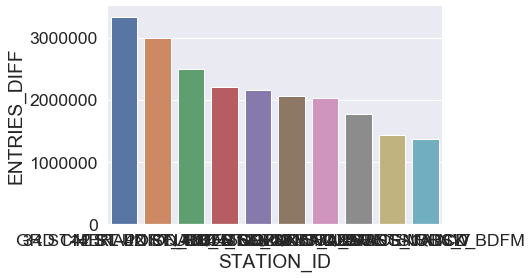

In [274]:
num_stations = 10
top_ten = sns.barplot(x = top_traffic_stations.index[:num_stations],
             y = top_traffic_stations['ENTRIES_DIFF'][:num_stations]
            )
sns.despine()



Oof. That's ugly at the bottom.

### Let's group by hour of day bins

In [25]:
station_list = df['STATION_ID'].unique()

# station_list

array(['59 ST_456NQRW', '5 AV/59 ST_NQRW', '57 ST-7 AV_NQRW',
       '49 ST_NQRW', 'TIMES SQ-42 ST_1237ACENQRSW',
       '34 ST-HERALD SQ_BDFMNQRW', '28 ST_NRW', '23 ST_NRW',
       '14 ST-UNION SQ_456LNQRW', '8 ST-NYU_NRW', 'PRINCE ST_NRW',
       'CANAL ST_6JNQRWZ', 'CITY HALL_NRW', 'CORTLANDT ST_NRW',
       'RECTOR ST_NRW', 'WHITEHALL S-FRY_1RW', 'DELANCEY/ESSEX_FJMZ',
       'BOWERY_JZ', 'CHAMBERS ST_456JZ', 'FULTON ST_2345ACJZ',
       'BROAD ST_JZ', '7 AV_BQ', 'PARK PLACE_S', 'BOTANIC GARDEN_2345S',
       'PROSPECT PARK_BQS', 'PARKSIDE AV_BQ', 'CHURCH AV_BQ',
       'BEVERLEY ROAD_BQ', 'CORTELYOU RD_BQ', 'NEWKIRK PLAZA_BQ',
       'AVENUE H_BQ', 'AVENUE J_BQ', 'AVENUE M_BQ', 'KINGS HWY_BQ',
       'AVENUE U_BQ', 'NECK RD_BQ', 'SHEEPSHEAD BAY_BQ',
       'BRIGHTON BEACH_BQ', 'OCEAN PKWY_Q', 'BOROUGH HALL_2345R',
       'JAY ST-METROTEC_R', 'DEKALB AV_BDNQR', 'ATL AV-BARCLAY_2345BDNQR',
       'UNION ST_R', '4AV-9 ST_DFGMNR', 'PROSPECT AV_R', '25 ST_R',
       '36 ST_DNR', '45 ST

In [20]:
#df[df['STATION_ID'] == '1 AV_L'][['STATION_ID','DAY_OF_WEEK','HODBIN','ENTRIES_DIFF']]

,STATION_ID,DAY_OF_WEEK,HODBIN,ENTRIES_DIFF
31083,1 AV_L,5,"(-1, 3]",0
31084,1 AV_L,5,"(3, 7]",0
31085,1 AV_L,5,"(7, 11]",0
31086,1 AV_L,5,"(11, 15]",0
31087,1 AV_L,5,"(15, 19]",0
...,...,...,...,...
648987,1 AV_L,4,"(3, 7]",164
648988,1 AV_L,4,"(7, 11]",186
648989,1 AV_L,4,"(11, 15]",511
648990,1 AV_L,4,"(15, 19]",721


GRD CNTRL-42 ST_4567S
34 ST-HERALD SQ_BDFMNQRW
14 ST-UNION SQ_456LNQRW
42 ST-PORT AUTH_1237ACENQRSW
FULTON ST_2345ACJZ
34 ST-PENN STA_ACE
TIMES SQ-42 ST_1237ACENQRSW
59 ST COLUMBUS_1ABCD
FLUSHING-MAIN_7
47-50 STS ROCK_BDFM


'GRD CNTRL-42 ST_4567S'

In [259]:
def makeHeatMaps(days_vs_hours, station_id, value_max = 100000):
    '''
    JL Chu, Metis Data Science, 2 April 2020
    
    Seaborn heatmap plotting of day vs hour entries for selected stations in stations_list.
    df must have columns STATION_ID, 
    DAY_OF_WEEK (as int), 
    HODBIN (as intervals, here defined as '12AM-3AM','4AM-7AM','8AM-11AM','12PM-3PM','4PM-7PM','8PM-12AM'), 
    and ENTRIES_DIFF
    
    Plots figures and saves them as format  station_id+'_heatmap.svg'
    '''
    
    xticks = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    yticks=['8PM-12AM','12AM-3AM','4AM-7AM','8AM-11AM','12PM-3PM','4PM-7PM',]
    
    station_title = station_id.split('_')
    print(station_title)

    plt.figure(figsize=[10,6])
    sns.set(font_scale=1.6)
    heatmap = sns.heatmap(data = days_vs_hours,
                          vmin=0,
                          vmax=value_max,
                          cmap = sns.light_palette("green", n_colors=16),
                          #cbar_kws={'label': 'Entries'}
                         )
    cbar = heatmap.collections[0].colorbar
    # Get Tick Labels in form xxxK - TODO: PUT IN OWN FUNCTION
    # 6 ticks from 0 to value_max
    cbticklabels = np.arange(0, (value_max+value_max/5)/1000, value_max/1000/5)
    cbticklabels = list(str(label) + 'k' for label in cbticklabels) 
    ticks = [x * value_max for x in [0, .2, .4, .6, .8, 1]]
    cbar.set_ticks(ticks, update_ticks=False)
    cbar.set_ticklabels(cbticklabels)
    
    heatmap.set_yticklabels(labels=yticks, fontsize=16,rotation=0)
    heatmap.set_xticklabels(labels=xticks, fontsize=16)
    heatmap.figure.axes[-1].yaxis.label.set_size(16)
    plt.xlabel('Day of the Week', fontsize=20)
    plt.ylabel('Time of Day', fontsize=20)
    plt.title('Transit Heatmap for '+station_title[0], fontsize=20)
    plt.savefig('/charts/'station_id+'_heatmap.png', format='png', transparent=True)
        

## Create day v hour heatmaps for each top ten station

In [264]:
stations = top_traffic_stations.index[:10]
# for station in stations:
#     print(station)
    
print(stations)

Index(['GRD CNTRL-42 ST_4567S', '34 ST-HERALD SQ_BDFMNQRW',
       '14 ST-UNION SQ_456LNQRW', '42 ST-PORT AUTH_1237ACENQRSW',
       'FULTON ST_2345ACJZ', '34 ST-PENN STA_ACE',
       'TIMES SQ-42 ST_1237ACENQRSW', '59 ST COLUMBUS_1ABCD',
       'FLUSHING-MAIN_7', '47-50 STS ROCK_BDFM'],
      dtype='object', name='STATION_ID')


['GRD CNTRL-42 ST', '4567S']
['34 ST-HERALD SQ', 'BDFMNQRW']
['14 ST-UNION SQ', '456LNQRW']
['42 ST-PORT AUTH', '1237ACENQRSW']
['FULTON ST', '2345ACJZ']
['34 ST-PENN STA', 'ACE']
['TIMES SQ-42 ST', '1237ACENQRSW']
['59 ST COLUMBUS', '1ABCD']
['FLUSHING-MAIN', '7']
['47-50 STS ROCK', 'BDFM']


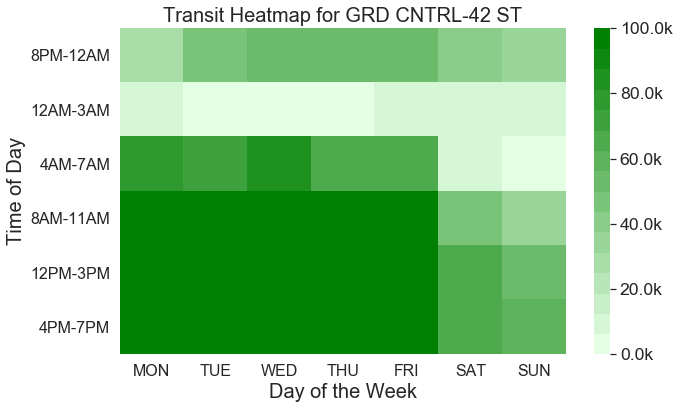

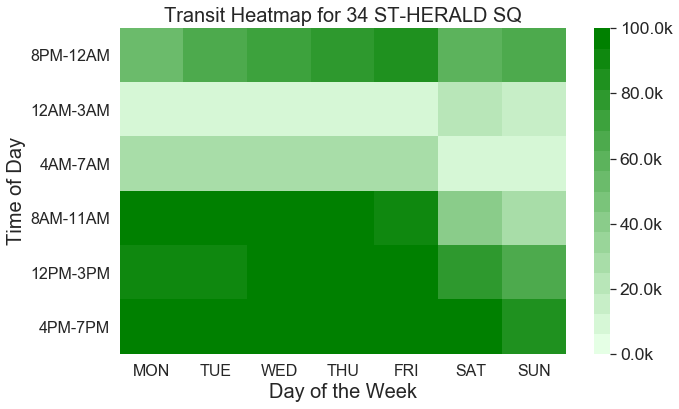

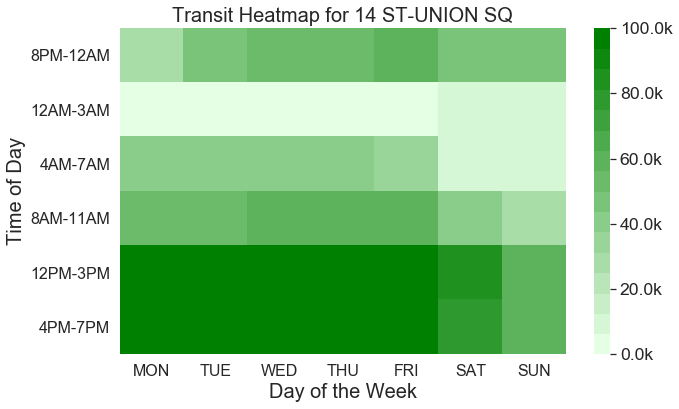

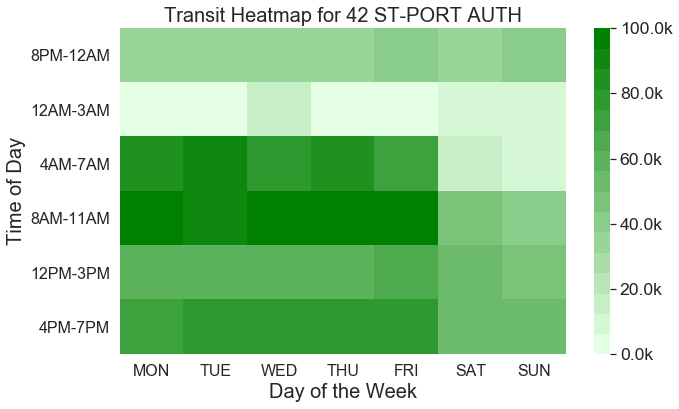

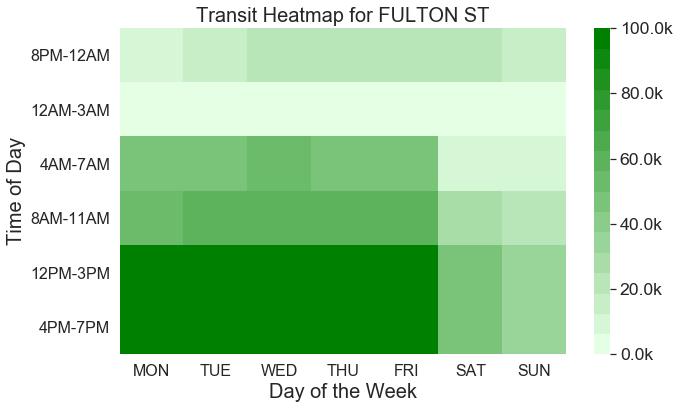

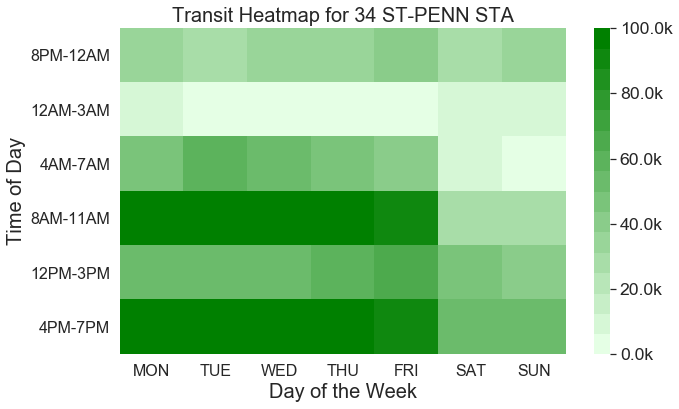

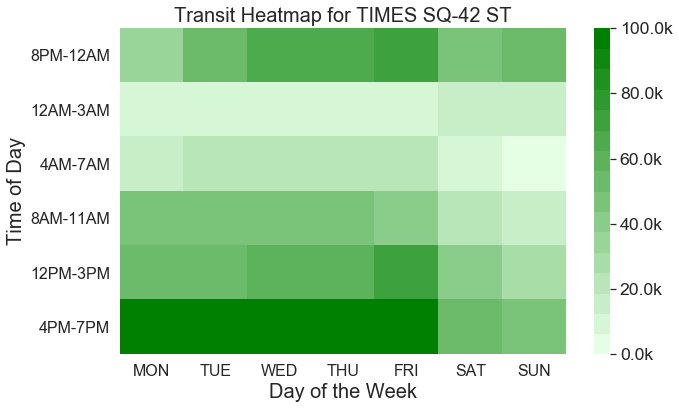

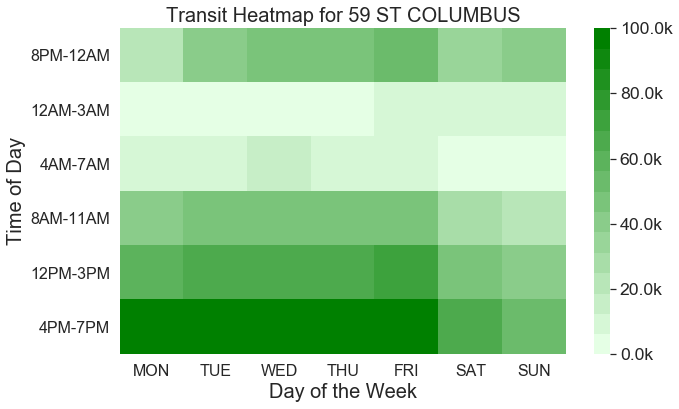

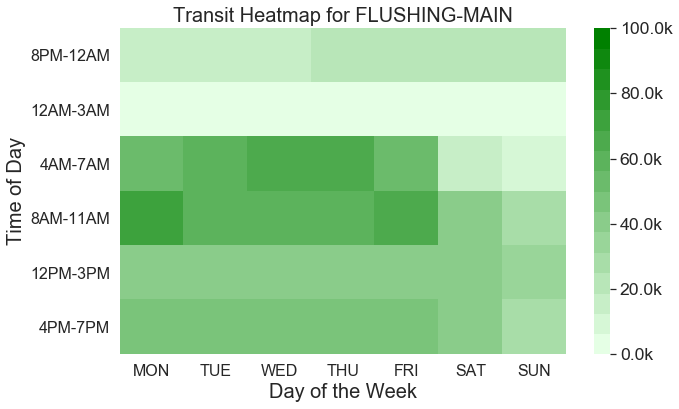

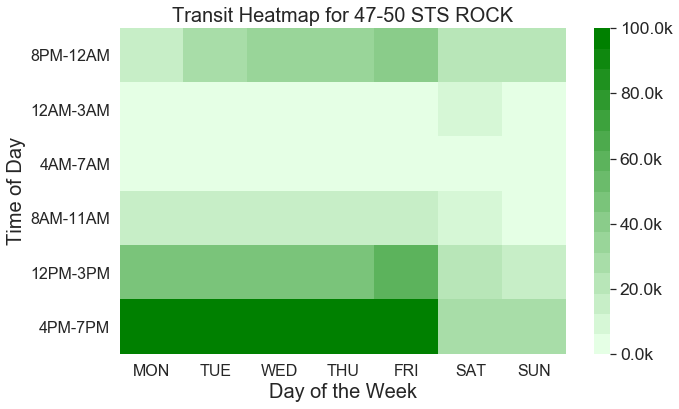

In [265]:
for station_id in stations:
    days_vs_hours = pd.pivot_table(df[df['STATION_ID'] == station_id][['STATION_ID','DAY_OF_WEEK','HODBIN','ENTRIES_DIFF']],
                                   index='HODBIN',
                                   values = 'ENTRIES_DIFF',
                                   columns='DAY_OF_WEEK',
                                   aggfunc='sum'
                                  )
    makeHeatMaps(days_vs_hours, station_id)


## Plot heatmap for all top ten stations

['Top Seven Stations Together']


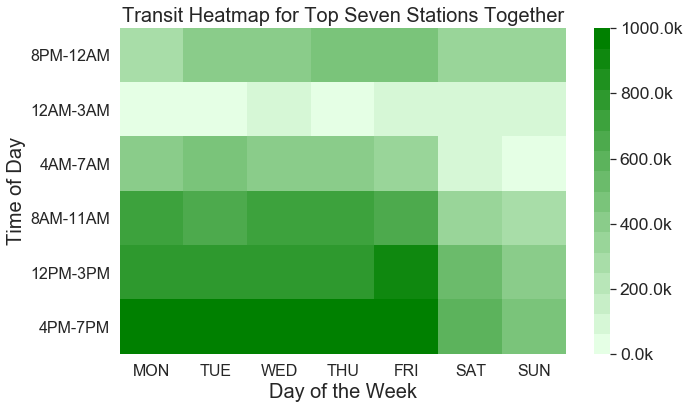

In [262]:
#df2[df2['id'].isin(['SP.POP.TOTL','NY.GNP.PCAP.CD'])]

top_ten_cumu_days_v_hours = pd.pivot_table(df[df['STATION_ID'].isin(stations)][['STATION_ID','DAY_OF_WEEK','HODBIN','ENTRIES_DIFF']],
                                           index='HODBIN',
                                           values = 'ENTRIES_DIFF',
                                           columns='DAY_OF_WEEK',
                                           aggfunc='sum'
                                          )
makeHeatMaps(top_ten_cumu_days_v_hours, 'Top Seven Stations Together', value_max=1e6)

## Plot heatmaps for 8 AVE-14 ST, 7 AVE-14 ST, 14 ST
The above three stations are closest to the Meatpacking district, where quite a few large tech companies have offices.

In [ ]:
# stations = top_traffic_stations.index[:10]

In [206]:
list_of_stations = pd.Series(top_traffic_stations.index[:])

In [263]:
type(list_of_stations)
(list_of_stations[list_of_stations.str.contains('14', regex=False)])
fourteenth_st_stations = list_of_stations[[20,57,192]].reset_index().drop(columns='index')
fourteenth_st_stations


,STATION_ID
0,14 ST_123FLM
1,14 ST_ACEL
2,14TH STREET_1


14 ST_123FLM
['14 ST', '123FLM']
14 ST_ACEL
['14 ST', 'ACEL']
14TH STREET_1
['14TH STREET', '1']


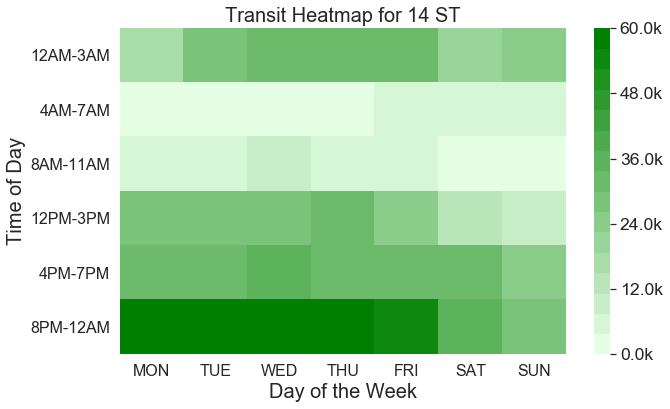

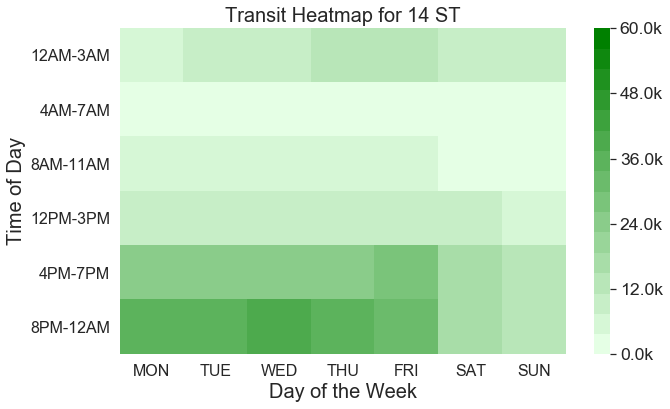

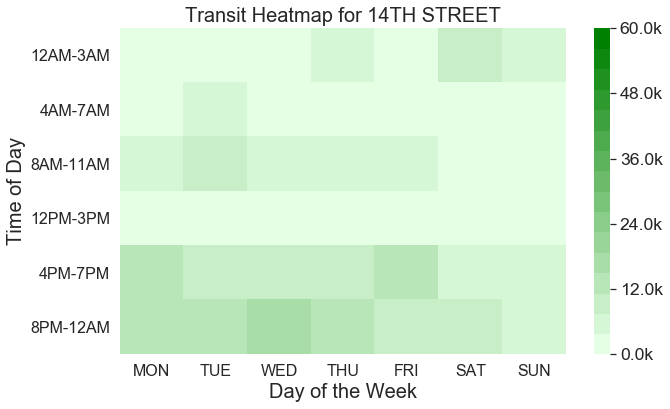

In [258]:
for station in fourteenth_st_stations['STATION_ID']:
    print(station)
    fourteenth_st_days_vs_hours = pd.pivot_table(df[df['STATION_ID'] == station][['STATION_ID','DAY_OF_WEEK','HODBIN','ENTRIES_DIFF']],
                                               index='HODBIN',
                                               values = 'ENTRIES_DIFF',
                                               columns='DAY_OF_WEEK',
                                               aggfunc='sum'
                                              )
    makeHeatMaps(fourteenth_st_days_vs_hours, station, value_max = 60000)